<br><br>
<font size='6'><b>Image Panorama with Regression</b></font><br><br>

__Load images__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
imag1 = cv2.imread('./data2/1.jpg')
imag1 = cv2.cvtColor(imag1, cv2.COLOR_BGR2RGB)
imag2 = cv2.imread('./data2/2.jpg')
imag2 = cv2.cvtColor(imag2, cv2.COLOR_BGR2RGB)
imag3 = cv2.imread('./data2/3.jpg')
imag3 = cv2.cvtColor(imag3, cv2.COLOR_BGR2RGB)

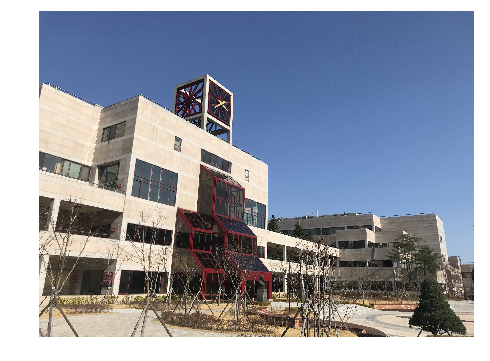

In [3]:
plt.figure(figsize=(10, 6))
plt.imshow(imag1)
plt.axis('off')
plt.show()

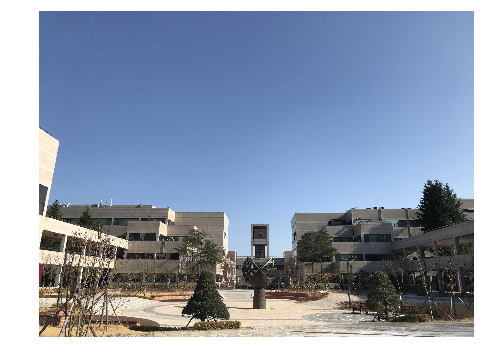

In [4]:
plt.figure(figsize=(10, 6))
plt.imshow(imag2)
plt.axis('off')
plt.show()

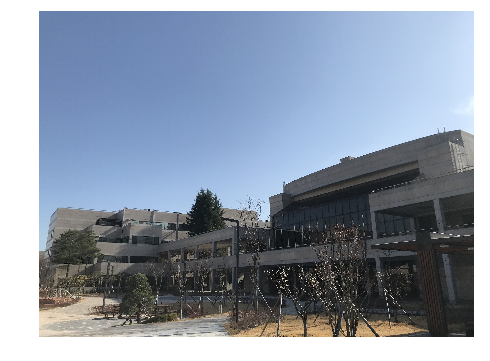

In [5]:
plt.figure(figsize=(10, 6))
plt.imshow(imag3)
plt.axis('off')
plt.show()

# Panorama

- Any wide-angle view or representation of a physical space
- images with horizontally elongated fields of view


- idea: projecting images onto a common plane

<img src="./image_files/mosaic.png", width = 500>

- Camera rotating about its center

<img src="./image_files/Hx.png", width = 500>

 - Two image planes are related by a homography $H$

 Do not worry about a homgraphy transformation. (out of this course's scope)
 
 
 $$ \begin{bmatrix}
x'\\y'\\1
\end{bmatrix}  \sim \begin{bmatrix}
\omega x'\\\omega y'\\\omega
\end{bmatrix} = \begin{bmatrix}
            a & b & c \\
            d & e & f \\            
            g & h & 1 \end{bmatrix}
\begin{bmatrix}
x\\y\\1
\end{bmatrix}            
            $$

- For the advanced learner, watch the following online lecture by Prof. Aaron Bobick

- Pictorial explantion of how to make a panorama
<br>
<img src="./image_files/panorama_reference.png", width = 400>

## Find key points between two images
 
- Suppose these matching points are given.
    - We have manually found the matching points for you, although there is a technique to do this.     


- pos1 and pos2 are matching points between img01 and img02
- pos3 and pos4 are matching points between img02 and img03

In [6]:
pos1 = np.array([[2121, 2117, 2749, 3095, 3032, 3375, 3677, 3876], [1431, 2034, 2033, 1885, 2017, 2037, 1885, 2279]])
pos2 = np.array([[188, 58, 828, 1203, 1121, 1437, 1717, 1817], [1217, 1909, 1952, 1827, 1952, 1991, 1870, 2226]])
pos3 = np.array([[2338, 2379, 2658, 2899, 2977, 3272, 2716, 2786], [1948, 1874, 2000, 1837, 1964, 1966, 2143, 2317]])
pos4 = np.array([[109, 178, 497, 795, 851, 1144, 534, 580], [1907, 1828, 1988, 1834, 1971, 1993, 2145, 2333]])

## Visualization of key points

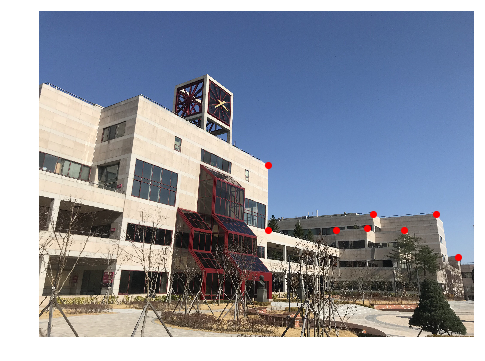

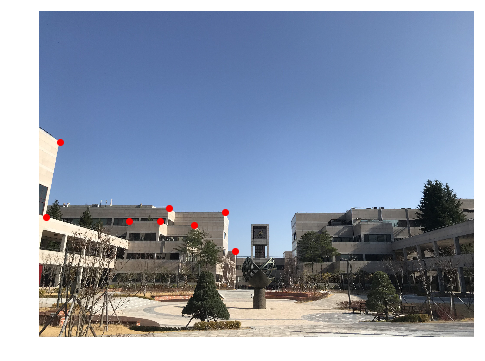

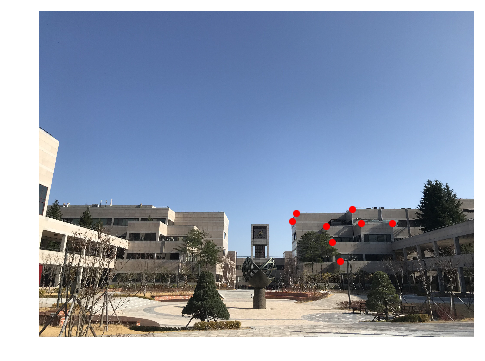

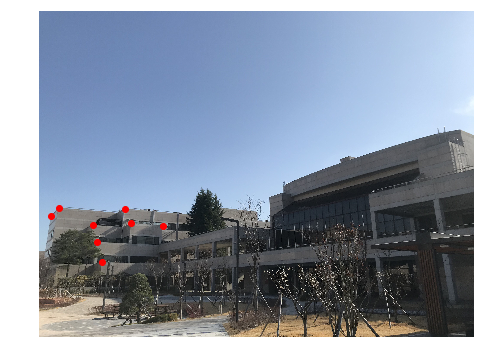

In [7]:
plt.figure(figsize=(10, 6))
plt.imshow(imag1)
plt.plot(pos1[0,:], pos1[1,:], 'ro', 'linewidth', 1)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(imag2)
plt.plot(pos2[0,:], pos2[1,:], 'ro', 'linewidth', 1)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(imag2)
plt.plot(pos3[0,:], pos3[1,:], 'ro', 'linewidth', 1)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(imag3)
plt.plot(pos4[0,:], pos4[1,:], 'ro', 'linewidth', 1)
plt.axis('off')
plt.show()

## Estimation of homography H

$$ X' = HX $$

where $ X $ and $X'$ are position vectors of key points, and $ H $ is a Perspective Transformation

__Goal: we need to estimate homography $H$ via matching potins between two images__


$$\begin{bmatrix}
    x' \\
    y' \\
    1 \end{bmatrix}
    \sim
    \begin{bmatrix}
    \omega x' \\
    \omega y' \\
    \omega \end{bmatrix}
    =
    \begin{bmatrix}
    \theta_{1} & \theta_{2} & \theta_{3} \\
    \theta_{4} & \theta_{5} & \theta_{6} \\
    \theta_{7} & \theta_{8} & 1 \end{bmatrix} 
    \begin{bmatrix}
    x\\
    y\\
    1 
\end{bmatrix}$$
    
<br>
$$ 
\begin{align*}
x' &= \frac{\theta_1 x+\theta_2 y+\theta_3}{\theta_7 x+\theta_8 y+1} \\
y' &= \frac{\theta_4 x+\theta_5 y+\theta_6}{\theta_7 x+\theta_8 y+1}
\end{align*}
$$
<br>
$$ 
\begin{align*}
\theta_1 x+\theta_2 y+\theta_3 -\theta_7 x'x-\theta_8 x'y-x' &= 0 \\
\theta_4 x+\theta_5 y+\theta_6 -\theta_7 y'x-\theta_8 y'y-y' &= 0 
\end{align*}
$$

<br>
For $m$ pairs of matching potins

- $ \Phi $ is a feature matrix

$$ \Phi = \begin{bmatrix}
            x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x'_{1}x_{1} & -x'_{1}y_{1}\\
            0 & 0 & 0 & x_{1} & y_{1} & 1 & -y'_{1}x_{1} & -y'_{1}y_{1}\\
            \vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots\\
            x_{m} & y_{m} & 1 & 0 & 0 & 0 & -x'_{m}x_{m} & -x'_{m}y_{m}\\
            0 & 0 & 0 & x_{m} & y_{m} & 1 & -y'_{m}x_{m} & -y'_{m}y_{m}\end{bmatrix} $$
         
         
           
- $ \theta $ is a column vector for unknown parameters in a perspective transformation $H$



$$ \theta = \begin{bmatrix}
            \theta_{1} \\
            \theta_{2} \\
            \theta_{3} \\
            \theta_{4} \\
            \theta_{5} \\
            \theta_{6} \\
            \theta_{7} \\
            \theta_{8}
            \end{bmatrix} $$
            
- $b$ is a column vector for corresponding positions in the base image

$$ b = \begin{bmatrix}
            x'_{1} \\ 
            y'_{1} \\
            x'_{2} \\
            y'_{2}  \\
            \vdots \\
            x'_{m} \\
            y'_{m} \end{bmatrix} $$
                    

- It ends up becoming a linear regression problem

$$ \min\limits_{\theta} \lVert \Phi\theta - b \rVert _2^2 $$

$$ \theta^* = (\Phi^T\Phi)^{-1}\Phi^T b $$


__Perspective homography for image 1 and image 2__

In [8]:
Phi01 = []
newpos01 = []
for i in range(8):
    temp1 = [[pos1[0,i], pos1[1,i], 1, 0, 0, 0, -pos2[0,i]*pos1[0,i], -pos2[0,i]*pos1[1,i]],
            [0, 0, 0, pos1[0,i], pos1[1,i], 1, -pos2[1,i]*pos1[0,i], -pos2[1,i]*pos1[1,i]]]
    temp2 = [[pos2[0,i]], [pos2[1,i]]]
    Phi01.append(temp1)
    newpos01.append(temp2)

Phi01 = np.concatenate(Phi01, axis=0)
newpos01 = np.concatenate(newpos01, axis=0).reshape(-1, 1)
Phi01 = np.asmatrix(Phi01)
newpos01 = np.asarray(newpos01)

perspective_theta = (Phi01.T*Phi01).I*Phi01.T*newpos01
perspective_theta = np.vstack([perspective_theta, [1]])
perspective_theta = perspective_theta.reshape(3, 3)

__Perspective homography for image 2 and image 3__

In [9]:
# Perspective homography for image  and image 2

Phi03 = []
newpos03 = []
for i in range(8):
    temp1 = [[pos4[0,i], pos4[1,i], 1, 0, 0, 0, -pos3[0,i]*pos4[0,i], -pos3[0,i]*pos4[1,i]],
            [0, 0, 0, pos4[0,i], pos4[1,i], 1, -pos3[1,i]*pos4[0,i], -pos3[1,i]*pos4[1,i]]]
    temp2 = [[pos3[0,i]], [pos3[1,i]]]
    Phi03.append(temp1)
    newpos03.append(temp2)

Phi03 = np.concatenate(Phi03, axis=0)
newpos03 = np.concatenate(newpos03, axis=0).reshape(-1, 1)
Phi03 = np.asmatrix(Phi03)
newpos03 = np.asarray(newpos03)

perspective_theta3 = (Phi03.T*Phi03).I*Phi03.T*newpos03
perspective_theta3 = np.vstack([perspective_theta3, [1]])
perspective_theta3 = perspective_theta3.reshape(3, 3)

In [10]:
translation = np.matrix([[1, 0, 6000],
                         [0, 1, 2500],
                         [0, 0, 1]])

## Image warping

- Again, do not worry about the image warping (outside lecture's scope)

In [11]:
warpedImage = cv2.warpPerspective(imag1, translation*perspective_theta, (18000, 6500))
warpedImage3 = cv2.warpPerspective(imag3, translation*perspective_theta3, (18000, 6500))

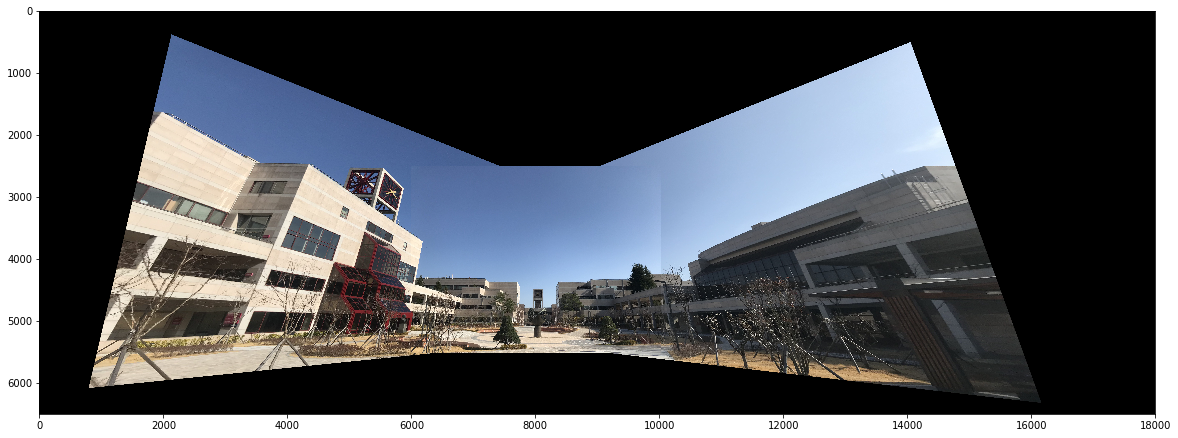

In [12]:
screen = warpedImage.copy()
screen[screen==0] = warpedImage3[screen==0]
screen[2500:3024+2500,6000:4032+6000] = imag2


plt.figure(figsize=(20, 12))
plt.imshow(screen)
plt.show()